## Generating Segmentation Masks from Ch0 Real IHC image

Segmenting Ch0 ROIs, you should have the ROI ready. 

In [18]:
import skimage as sk
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt

In [2]:
def main(h5path
        ,train_home
        ,xstart
        ,ystart
        ,zstart
        ,ROI_dim
        ,no_of_layer
        ):

        filename = h5path
        split = filename.count("/") - 1
        blockname = filename.split("/")[split]
        print(blockname,"[ xyz:",xstart,ystart,zstart,"]")

        seg_dir = train_home + "//train" + "//Ch0_seg"
        if not os.path.exists(seg_dir):
                os.mkdir(seg_dir)

        ch0_dir = train_home + '//train' + os.sep + 'ch0'

        xstop = xstart + ROI_dim
        xcoords = (xstart, xstop)

        ystop = ystart + ROI_dim
        ycoords = (ystart, ystop)

        zstop = zstart + no_of_layer
        zcoords = (zstart, zstop)  

        from CollectCh0Stack import collectCh0ROI   

        ROI_blocks, Seg_blocks = collectCh0ROI(seg_dir, ch0_dir,
                                                blockname, 
                                                xcoords, 
                                                ycoords, 
                                                zcoords)

        return ROI_blocks, Seg_blocks

In [168]:
import pandas as pd
fname = "../coords/CD31/ROI_coords_2023-12-30_cd31_19-036I_done.csv" #change this
df = pd.read_csv(fname)
df = df.dropna(how="all")

# for i in range(len(df)):
i = 9
print("ROI #", i)

h5path = df["h5path"][i]
Ab_home = df["Abhome"][i]
xstart = df["xcoord"][i]
ystart = df["ycoord"][i]
zstart = df["zcoord"][i]
ROI_dim = df["ROIdim"][i]
no_of_layer = df["No_ofLayers"][i]

ROI_blocks, Seg_blocks = main(h5path
                             ,Ab_home
                             ,xstart,ystart,zstart
                             ,ROI_dim,no_of_layer)

ROI # 9
OTLS4_NODO_12-15-23_19-36I_CD31 [ xyz: 362 4106 120 ]
W:/ITAS3D_training_data/CD31-neww//train//Ch0_seg\OTLS4_NODO_12-15-23_19-36I_CD31_Xpos_000362_000874_Ypos_004106_004618_stack_000120_000184


64
W:/ITAS3D_training_data/CD31-neww//train\ch0\OTLS4_NODO_12-15-23_19-36I_CD31_Xpos_000362_000874_Ypos_004106_004618_stack_000120_000184\OTLS4_NODO_12-15-23_19-36I_CD31_s02_pos362874_pos41064618_000165.jpeg


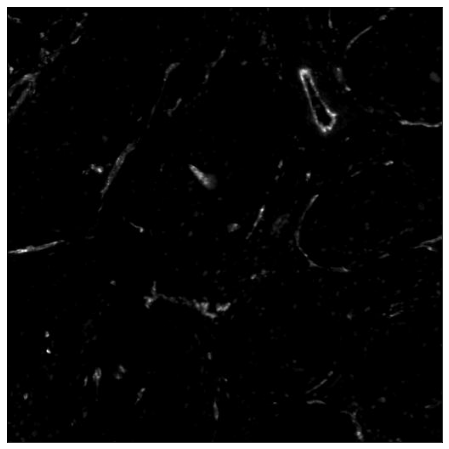

In [173]:
def view_slice(img):
    

    fig, ax = plt.subplots(figsize=(8,8))
    plt.tick_params(axis='both', which='both', top=False,
                    bottom=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
    ax.volume = img

    # ax.set_title("thres")
    vmax = img.max()
    ax.imshow(ax.volume, cmap="gray", vmax=vmax)
    # print(vmax)

idx = 45
print(len(ROI_blocks[0][0]))
slice = ROI_blocks[0][0][idx]
pgp = sk.io.imread(slice)
print(slice)
view_slice(pgp)

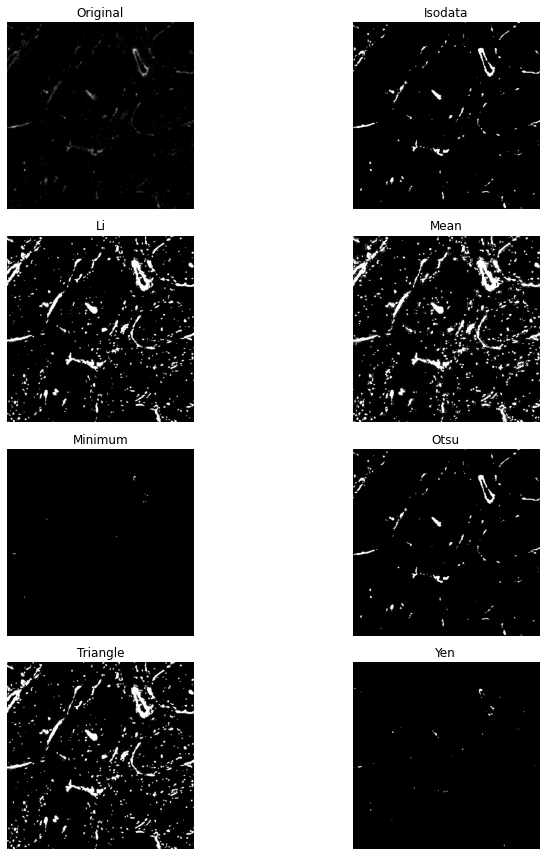

In [174]:
from skimage.filters import try_all_threshold

fig,ax = try_all_threshold(pgp, figsize=(12,12),verbose=False)
plt.show()

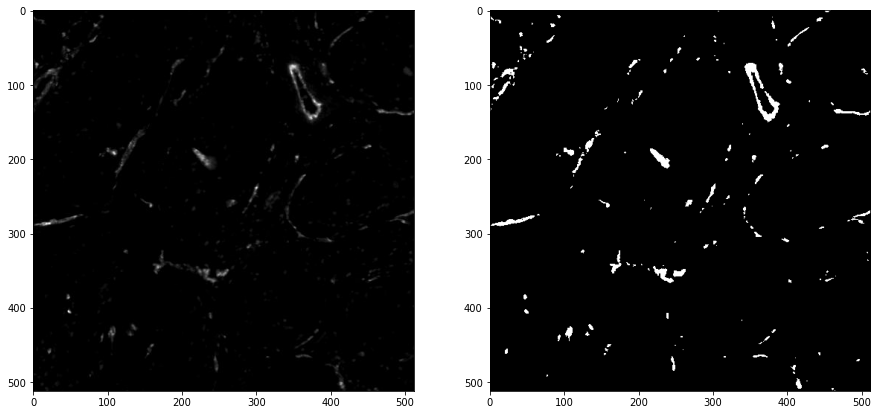

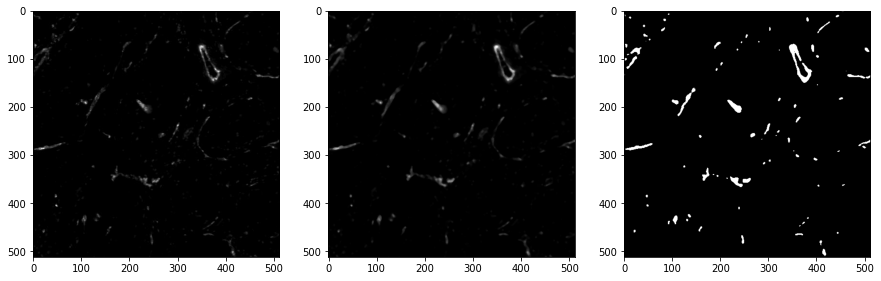

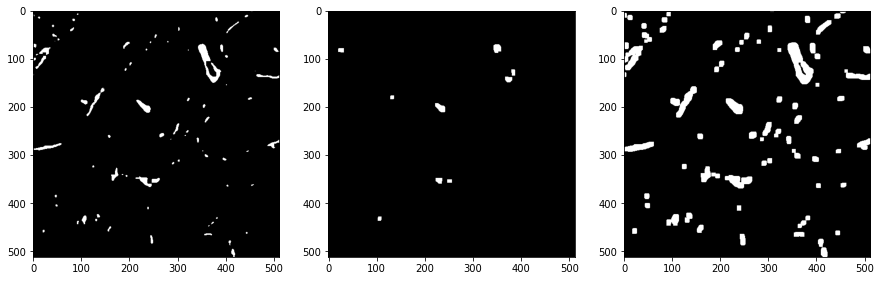

In [179]:
import cv2 as cv
pgp_median = cv.medianBlur(pgp, 5)
thresh = sk.filters.threshold_otsu(pgp)
pgp_binary = pgp > thresh
_, ax = plt.subplots(1,2, figsize=(15,15))

ax[1].imshow(pgp_binary,cmap="gray")
ax[0].imshow(pgp, cmap="gray")

pgp_median = cv.medianBlur(pgp, 5)
thresh = sk.filters.threshold_otsu(pgp_median)
pgp_binary = pgp_median > thresh
_, ax1 = plt.subplots(1,3, figsize=(15,15))
ax1[1].imshow(pgp_median, cmap="gray")
ax1[2].imshow(pgp_binary,cmap="gray")
ax1[0].imshow(pgp, cmap="gray")

kernel = sk.morphology.square(7)
pgp_closed = sk.morphology.binary_closing(pgp_binary,kernel)
pgp_opened = sk.morphology.binary_opening(pgp_binary,kernel)
pgp_dilated = sk.morphology.binary_dilation(pgp_binary,kernel)
_, ax2 = plt.subplots(1,3, figsize=(15,15))
ax2[0].imshow(pgp_closed,cmap="gray")
ax2[1].imshow(pgp_opened,cmap="gray")
ax2[2].imshow(pgp_dilated,cmap="gray")


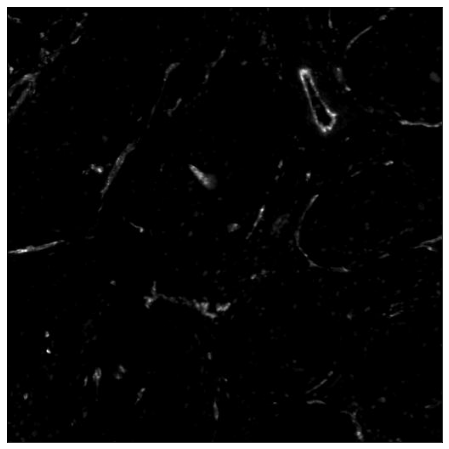

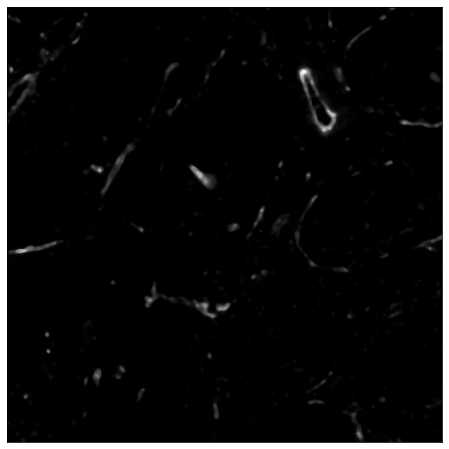

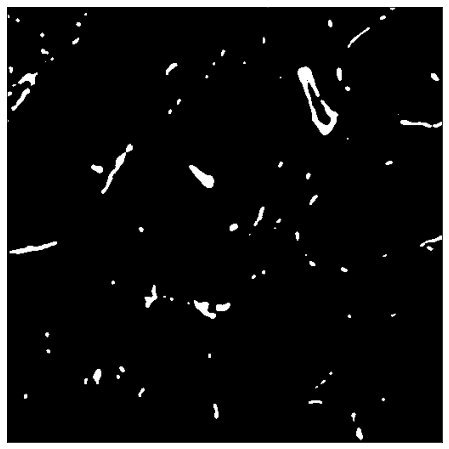

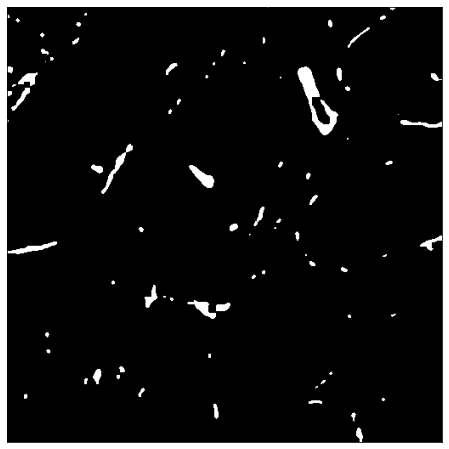

In [180]:
view_slice(pgp)
view_slice(pgp_median)
view_slice(pgp_binary)
view_slice(pgp_closed)
# view_slice(pgp)